<div style="color:#62caf0;">
<h2 style="font-weight:700">CS 4103 - Intelligent Systems</h2>
<h3>Hands-on Example 1 - Normalization and Standardization</h3>
<h4>September 6, 2023</h4>
</div>

In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [19]:
wine = pd.read_csv('winequality-red.csv',usecols=['fixed acidity','citric acid','total sulfur dioxide','alcohol'])
wine.head()

,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,7.4,0.00,34.0,9.4
1,7.8,0.00,67.0,9.8
2,7.8,0.04,54.0,9.8
3,11.2,0.56,60.0,9.8
4,7.4,0.00,34.0,9.4


<div style="font-family: WildWest; line-height: 2; color: IndianRed; text-align: justify">
    📊👉 <b>Standardization</b> :
    <ol start="1">
        <li> <b>Standard Scaler</b>,</li>
    </ol>
</div>

<div style="font-family: WildWest; line-height: 2; color: Green; text-align: justify">
    📈👉 <b>Normalization:</b> :
    <ol start="1">
        <li> <b>Min Max Scaling</b>,</li>
        <li> <b>Robust Scaling</b>,</li>
        <li> <b>Max Absolute Scaling</b>,</li>
    </ol>
</div>

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> Feature Scaling </h1>

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing. 

Many machine learning algorithms like Gradient descent methods, KNN algorithm, linear and logistic regression, etc. require data scaling to produce good results. Various scalers are defined for this purpose

Some machine learning models are fundamentally based on distance matrix, also known as the distance-based classifier, for example, K-Nearest-Neighbours, SVM, and Neural Network. Feature scaling is extremely essential to those models, especially when the range of the features is very different. Otherwise, features with a large range will have a large influence in computing the distance.

Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics, and it does not require making a very strong assumption about the distribution of the data, such as k-nearest neighbours and artificial neural networks. However, Normalisation does not treat outliners very well. On the contrary, standardisation allows users to better handle the outliers and facilitate convergence for some computational algorithms like gradient descent. Therefore, we usually prefer standardisation over Min-Max Normalisation.


<center><img src="https://miro.medium.com/max/1400/1*qRmiffZgkNaXnTBZwDafCA.png" alt="Heart Disease" width="70%"></center>

In [20]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(wine)
minmax = pd.DataFrame(minmax, columns =['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(wine)
standard = pd.DataFrame(standard, columns =['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(wine)
robust = pd.DataFrame(robust, columns =['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

In [21]:
print('\033[1m'+'Without scaling:'+'\033[0m')
display(wine.head())
print('*' * 45)
print('\033[1m'+'With minmax scaling:'+'\033[0m')
display(minmax.head())
print('*' * 45)
print('\033[1m'+'With standard scaling:'+'\033[0m')
display(standard.head())
print('*' * 45 )
print('\033[1m'+'With robust scaling:'+'\033[0m')
display(robust.head())

Without scaling:


,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,7.4,0.00,34.0,9.4
1,7.8,0.00,67.0,9.8
2,7.8,0.04,54.0,9.8
3,11.2,0.56,60.0,9.8
4,7.4,0.00,34.0,9.4


*********************************************
With minmax scaling:


,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,0.247788,0.00,0.098940,0.153846
1,0.283186,0.00,0.215548,0.215385
2,0.283186,0.04,0.169611,0.215385
3,0.584071,0.56,0.190813,0.215385
4,0.247788,0.00,0.098940,0.153846


*********************************************
With standard scaling:


,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,-0.528360,-1.391472,-0.379133,-0.960246
1,-0.298547,-1.391472,0.624363,-0.584777
2,-0.298547,-1.186070,0.229047,-0.584777
3,1.654856,1.484154,0.411500,-0.584777
4,-0.528360,-1.391472,-0.379133,-0.960246


*********************************************
With robust scaling:


,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,-0.238095,-0.787879,-0.100,-0.50
1,-0.047619,-0.787879,0.725,-0.25
2,-0.047619,-0.666667,0.400,-0.25
3,1.571429,0.909091,0.550,-0.25
4,-0.238095,-0.787879,-0.100,-0.50


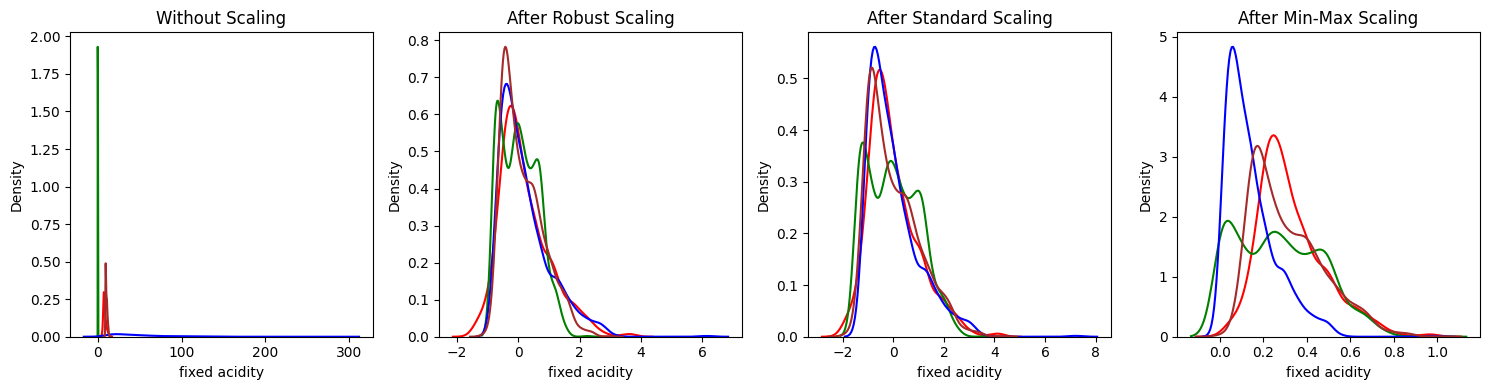

In [22]:
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
sns.kdeplot(wine['fixed acidity'], color ='red')
sns.kdeplot(wine['citric acid'],  color ='green')
sns.kdeplot(wine['total sulfur dioxide'],  color ='blue')
sns.kdeplot(wine['alcohol'],  color ='brown')
plt.title('Without Scaling')

plt.subplot(1,4,4) 
sns.kdeplot(minmax['fixed acidity'],  color ='red')
sns.kdeplot(minmax['citric acid'],  color ='green')
sns.kdeplot(minmax['total sulfur dioxide'],  color ='blue')
sns.kdeplot(minmax['alcohol'],  color ='brown')
plt.title('After Min-Max Scaling')

plt.subplot(1,4,3)
sns.kdeplot(standard['fixed acidity'], color ='red')
sns.kdeplot(standard['citric acid'],  color ='green')
sns.kdeplot(standard['total sulfur dioxide'],  color ='blue')
sns.kdeplot(standard['alcohol'],  color ='brown')
plt.title('After Standard Scaling')

plt.subplot(1,4,2)
sns.kdeplot(robust['fixed acidity'],  color ='red')
sns.kdeplot(robust['citric acid'],  color ='green')
sns.kdeplot(robust['total sulfur dioxide'],  color ='blue')
sns.kdeplot(robust['alcohol'],  color ='brown')
plt.title('After Robust Scaling')


plt.tight_layout()
plt.show()

In [23]:
wine.std()

fixed acidity            1.741096
citric acid              0.194801
total sulfur dioxide    32.895324
alcohol                  1.065668
dtype: float64

In [24]:
minmax.std()

fixed acidity           0.154079
citric acid             0.194801
total sulfur dioxide    0.116238
alcohol                 0.163949
dtype: float64

In [25]:
standard.std()

fixed acidity           1.000313
citric acid             1.000313
total sulfur dioxide    1.000313
alcohol                 1.000313
dtype: float64

In [26]:
robust.std()

fixed acidity           0.829093
citric acid             0.590306
total sulfur dioxide    0.822383
alcohol                 0.666042
dtype: float64

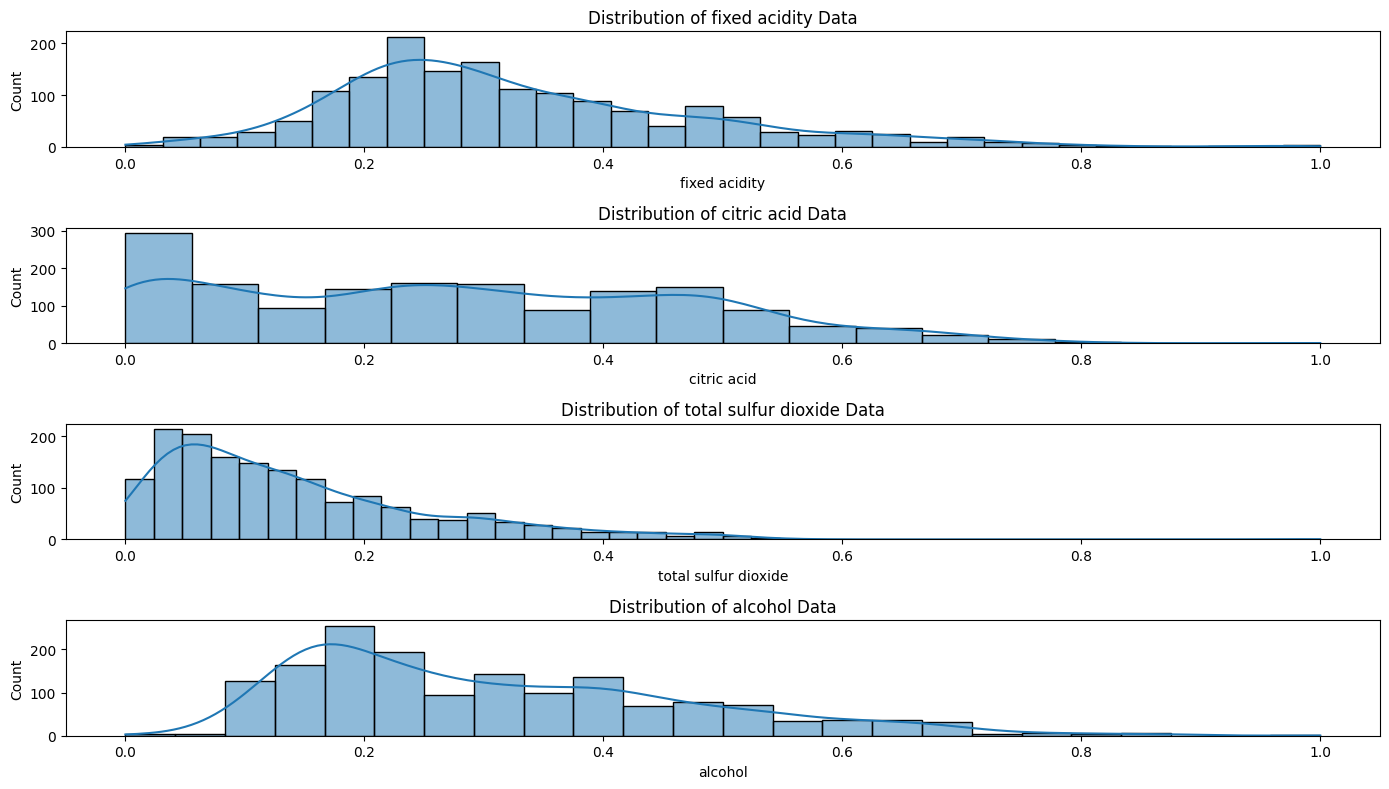

In [27]:
## Distribution of data with MinMax Scaling
plt.figure(figsize=(14,8))
for i,col in enumerate(minmax.columns,1):
    plt.subplot(4,1,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(minmax[col],kde=True)
    plt.tight_layout()
    plt.plot()

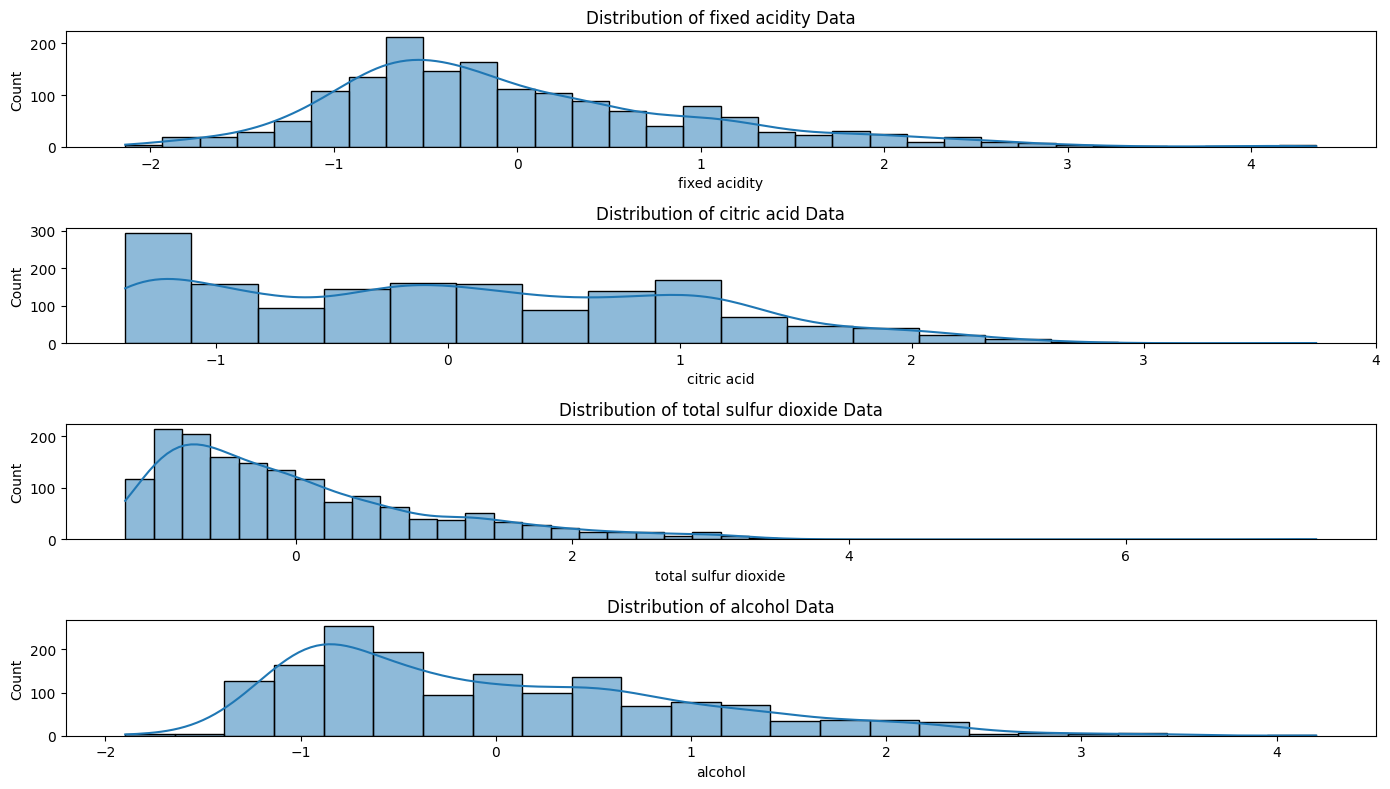

In [28]:
## Distribution of data with Standard Scaler Scaling
plt.figure(figsize=(14,8))
for i,col in enumerate(standard.columns,1):
    plt.subplot(4,1,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(standard[col],kde=True)
    plt.tight_layout()
    plt.plot()

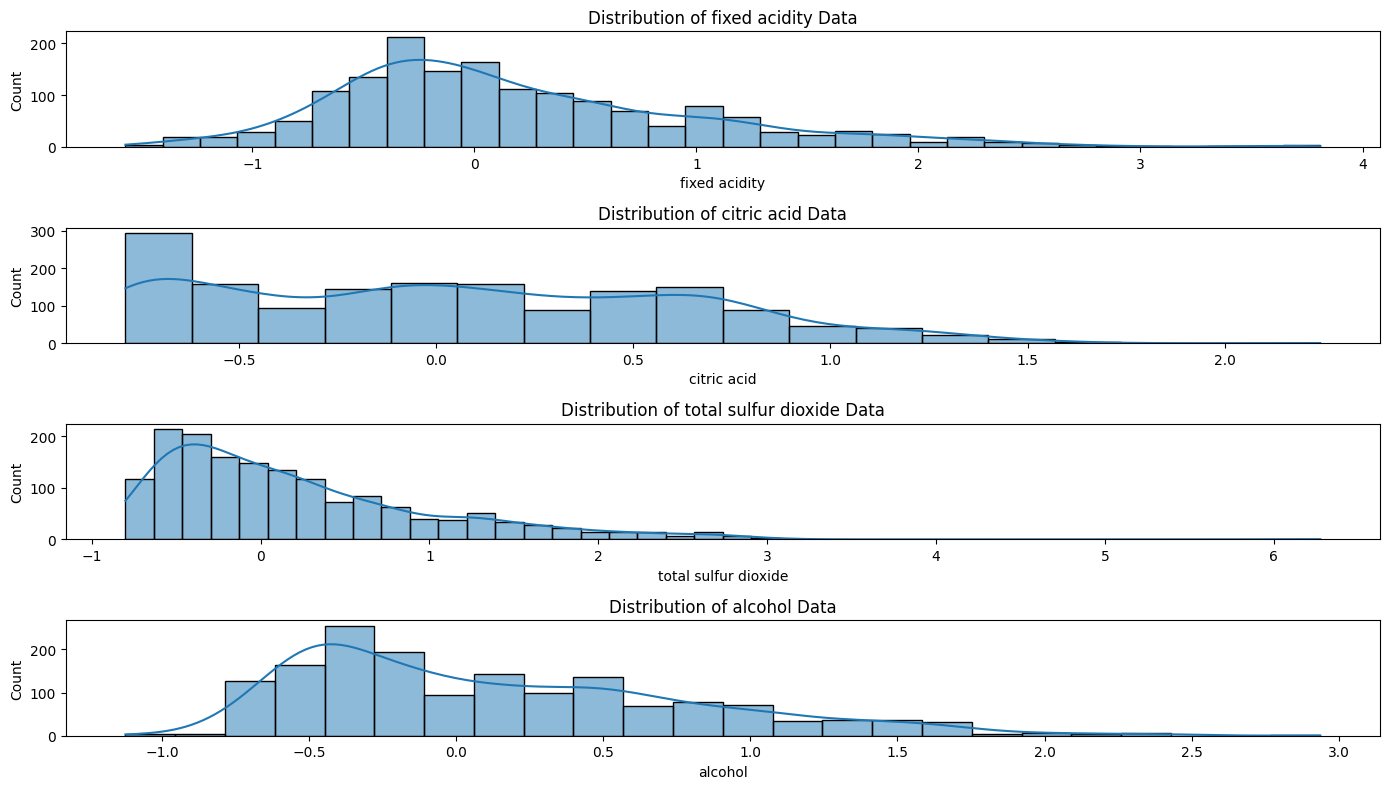

In [29]:
## Distribution of data with Robust Scaling
plt.figure(figsize=(14,8))
for i,col in enumerate(robust.columns,1):
    plt.subplot(4,1,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(robust[col],kde=True)
    plt.tight_layout()
    plt.plot()

<font color="IndianRed" size=+2 face="WildWest"><div style="text-align: justify">Data comparison using various scales</font>

<center><img src="https://miro.medium.com/max/1400/0*1z5qSf5fjqEnVdx5.png" alt="Heart Disease" width="60%"></center>

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> Data Visualization </h1>

<h2 style="text-align: justify; font-family: 'WildWest'; font-size:20px; color:IndianRed"> Distplot before and after StandardScaler Standardization between citric acid and total sulfur dioxide </h2>

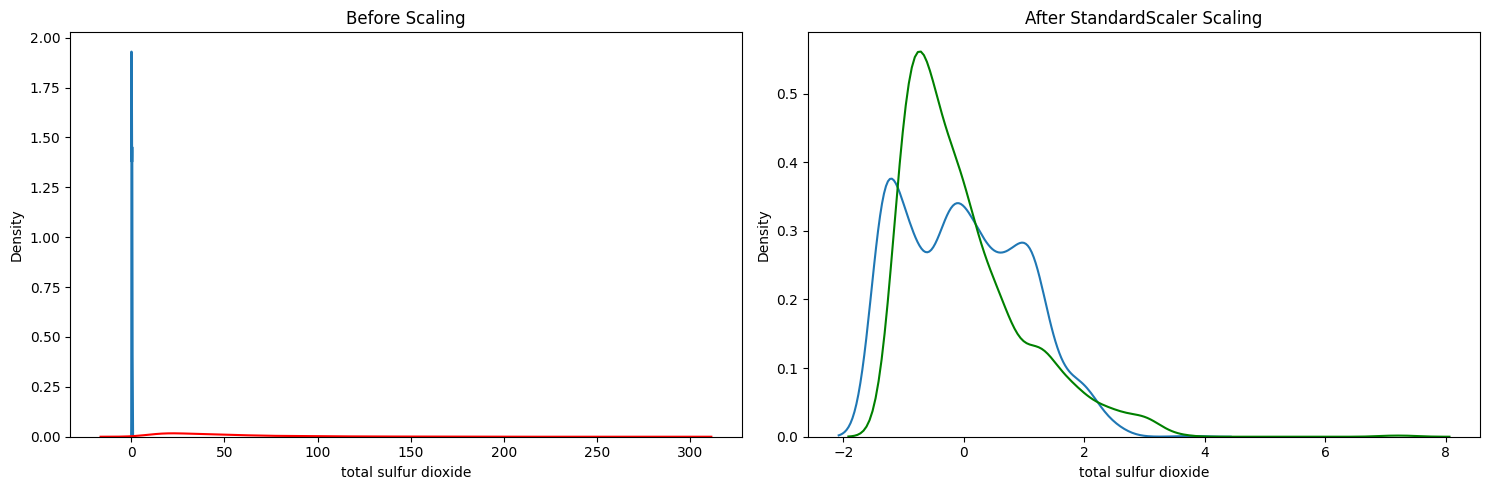

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(wine['citric acid'],hist = False)
sns.distplot(wine['total sulfur dioxide'],hist = False,color='red')
plt.title('Before Scaling')

plt.subplot(122)
sns.distplot(standard['citric acid'],hist = False)
sns.distplot(standard['total sulfur dioxide'],hist = False,color='green')
plt.title('After StandardScaler Scaling')

plt.tight_layout()
plt.show()

<h2 style="text-align: justify; font-family: 'WildWest'; font-size:20px; color:IndianRed"> Distplot before and after MinMaxdScaler Standardization between citric acid and total sulfur dioxide </h2>

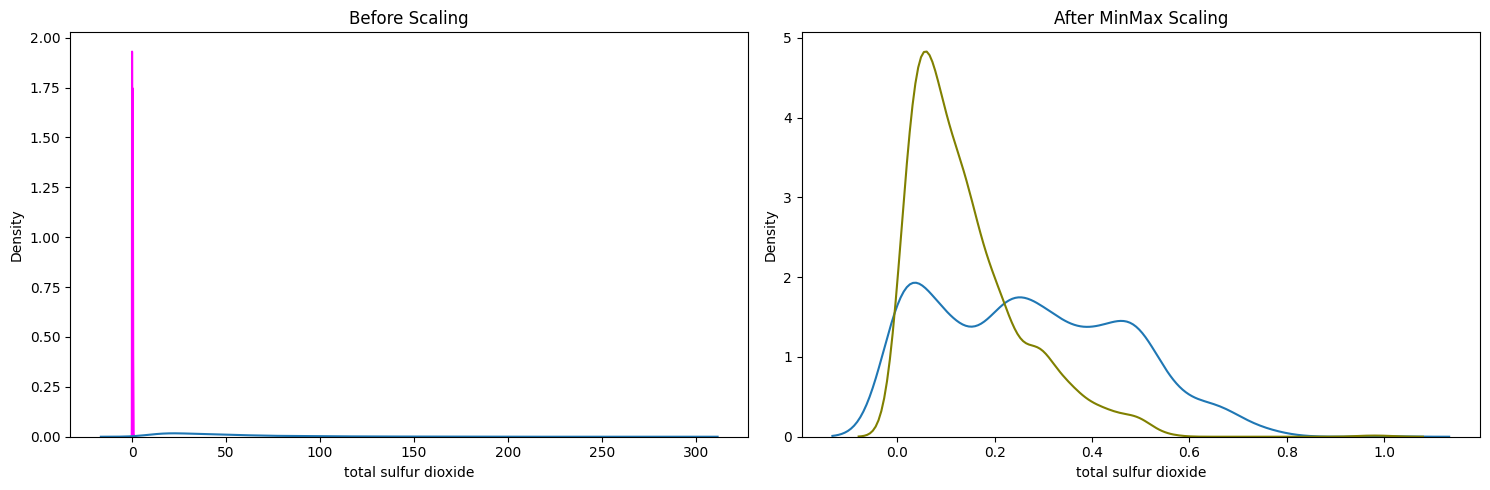

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(wine['citric acid'],hist = False,color='magenta')
sns.distplot(wine['total sulfur dioxide'],hist = False)
plt.title('Before Scaling')

plt.subplot(122)
sns.distplot(minmax['citric acid'],hist = False)
sns.distplot(minmax['total sulfur dioxide'],hist = False, color='olive')
plt.title('After MinMax Scaling')

plt.tight_layout()
plt.show()

<h2 style="text-align: justify; font-family: 'WildWest'; font-size:20px; color:IndianRed"> Distplot before and after RobustScaler Standardization between citric acid and total sulfur dioxide </h2>

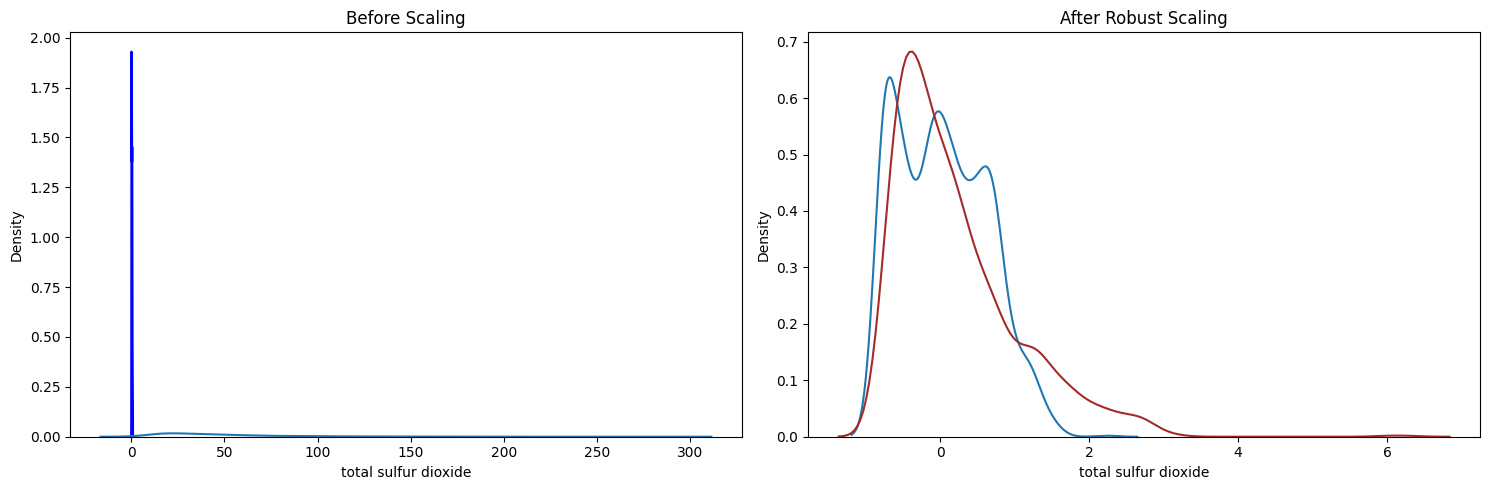

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(wine['citric acid'],hist = False,color='Blue')
sns.distplot(wine['total sulfur dioxide'],hist = False)
plt.title('Before Scaling')

plt.subplot(122)
sns.distplot(robust['citric acid'],hist = False)
sns.distplot(robust['total sulfur dioxide'],hist = False, color='Brown')
plt.title('After Robust Scaling')

plt.tight_layout()
plt.show()

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> Model Building </h1>

In [35]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

total sulfur dioxide    65.0000
free sulfur dioxide     21.0000
fixed acidity            3.4000
alcohol                  2.2000
residual sugar           1.1650
quality                  1.0000
citric acid              0.4600
volatile acidity         0.3515
pH                       0.3000
sulphates                0.2800
chlorides                0.0350
density                  0.0036
dtype: float64

In [37]:
wine1 = df [~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
X = wine1.drop(['quality'],axis=1) 
y = wine1['quality']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

<h2 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> Without Scaling </h2>

In [40]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
662,7.2,0.57,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6
334,7.9,0.65,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7
545,9.1,0.47,0.49,2.6,0.094,38.0,106.0,0.99820,3.08,0.59,9.1
1504,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4


LogisticRegression

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy_without_scaling = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy_without_scaling ,"%")

Training Accuracy    : 60.46 %
Model Accuracy Score : 57.45 %


SVM 

In [43]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy_without_scaling = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy_without_scaling ,"%")


Training Accuracy    : 51.6 %
Model Accuracy Score : 50.0 %


<h2 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> Normalization or Minmax Scaling </h2>

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here's the fromula for normalization : 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNTim8myrANAyT40fiESsQH9DgI9wrQfAvVQ&usqp=CAU" alt="Heart Disease" width="40%"></center>

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

- Normalization or Min-Max Scaling is used to transform features to be on a similar scale. The new point is calculated as:

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_minmax = pd.DataFrame(X_train, columns=X.columns)
X_test_minmax = pd.DataFrame(X_test, columns=X.columns)

In [45]:
X_train_minmax.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.634615,0.160804,0.736842,0.266667,0.466667,0.285714,0.339623,0.659185,0.288462,0.287356,0.250000
1,0.250000,0.452261,0.078947,0.186667,0.474074,0.142857,0.132075,0.592685,0.480769,0.425287,0.214286
2,0.317308,0.532663,0.013158,0.426667,0.488889,0.285714,0.201258,0.517872,0.461538,0.471264,0.589286
3,0.432692,0.351759,0.644737,0.453333,0.607407,0.660714,0.628931,0.675810,0.211538,0.298851,0.125000
4,0.278846,0.261307,0.750000,0.373333,0.696296,0.071429,0.037736,0.497091,0.480769,0.252874,0.535714


LogisticRegression

In [46]:
### from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_minmax, y_train)
y_pred_lr = logreg.predict(X_test_minmax)

log_train = round(logreg.score(X_train_minmax, y_train) * 100, 2)
log_accuracy_MinMax = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy_MinMax ,"%")

Training Accuracy    : 63.39 %
Model Accuracy Score : 59.93 %


SVM

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_minmax, y_train)
y_pred_svc = svc.predict(X_test_minmax)

svc_train = round(svc.score(X_train_minmax, y_train) * 100, 2)
svc_accuracy_MinMax = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy_MinMax ,"%")

Training Accuracy    : 67.64 %
Model Accuracy Score : 64.18 %


<h2 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> StandardScaler </h2>

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

Here's the formula for Standarization:

<center><img src="https://media.licdn.com/dms/image/C4E12AQENuY7WnIh9_g/article-inline_image-shrink_1000_1488/0/1611663105690?e=1697673600&v=beta&t=Nexd1QL7NncQrnMYessIAl4DH6dBRir26hmIN-I6Qtk" alt="Heart Disease" width="40%"></center>


In machine learning, It is a technique where are the values are centered around the mean with a unit standard deviation (µ=0 and σ=1). It means that the attributes of the mean are zero and the resultant distribution has a unit standard deviation

Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

Standardization can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Geometrically speaking, it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively. We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.

Standardization does not get affected by outliers because there is no predefined range of transformed features.

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_standard = pd.DataFrame(X_train, columns=X.columns)
X_test_standard = pd.DataFrame(X_test, columns=X.columns)

In [49]:
X_train_standard.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.692024,-1.414066,1.575256,-0.623544,-0.276006,0.134514,0.515259,0.755006,-1.096198,-0.459195,-0.606607
1,-0.631220,0.284901,-1.051568,-1.130712,-0.215258,-0.680425,-0.588118,0.310931,0.269811,0.458111,-0.799903
2,-0.224652,0.753582,-1.314250,0.390792,-0.093761,0.134514,-0.220325,-0.188653,0.133210,0.763880,1.229707
3,0.472321,-0.300950,1.207500,0.559848,0.878211,2.273728,2.053298,0.866025,-1.642601,-0.382753,-1.283144
4,-0.456977,-0.828215,1.627792,0.052680,1.607190,-1.087894,-1.089652,-0.327426,0.269811,-0.688522,0.939763


In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_standard, y_train)
y_pred_lr = logreg.predict(X_test_standard)

log_train = round(logreg.score(X_train_standard, y_train) * 100, 2)
log_accuracy_std = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy_std ,"%")

Training Accuracy    : 63.21 %
Model Accuracy Score : 59.57 %


In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_standard, y_train)
y_pred_svc = svc.predict(X_test_standard)

svc_train = round(svc.score(X_train_standard, y_train) * 100, 2)
svc_accuracy_std = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy_std ,"%")

Training Accuracy    : 69.77 %
Model Accuracy Score : 63.48 %


<font color="IndianRed" size=+2 face="WildWest"><div style="text-align: StandardScaler">Normalization vs Standardization </font>

- The term normalization and standardization are used a lot in statistics and data science. We sometimes use them interchangeably. People usually get confused between these two terms. But there is a subtle difference between these two.

-  scaling is one of the most important data preprocessing step in machine learning. Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.

- Tree-based algorithms are fairly insensitive to the scale of the features. Also, feature scaling helps machine learning, and deep learning algorithms train and converge faster.

- There are some feature scaling techniques such as Normalization and Standardization that are the most popular and at the same time, the most confusing ones.


<center><img src="https://www.someka.net/wp-content/uploads/2020/08/difference-between-normalization-standardization-1.png" alt="Heart Disease" width="60%"></center>

<font color="IndianRed" size=+2 face="WildWest"><div style="text-align: justify">Difference between Normalization and Standardization</font>

| _S.NO.__ | __Normalization__ | __Standardization__ |
|------------|-------|------------|
| 1    | Minimum and maximum value of features are used for scaling  |Mean and standard deviation is used for scaling.      |
| 2   | It is used when features are of different scales | It is used when we want to ensure zero mean and unit standard deviation      |
|3   | Scales values between [0, 1] or [-1, 1]. | It is not bounded to a certain range.      |
|4    | It is really affected by outliers. | It is really affected by outliers.     |
|5   | It is really affected by outliers. | Scikit-Learn provides a transformer called StandardScaler for standardization.     |
| 6   | This transformation squishes the n-dimensional data into an n-dimensional unit hypercube. | It translates the data to the mean vector of original data to the origin and squishes or expands.      |
|7    | It is useful when we don’t know about the distribution | It is useful when the feature distribution is Normal or Gaussian.      |
| 8   | It is a often called as Scaling Normalization | It is a often called as Z-Score Normalization.      |


In the End, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

<h2 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> RobustScaler </h2>

In [53]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_robust = pd.DataFrame(X_train, columns=X.columns)
X_test_robust = pd.DataFrame(X_test, columns=X.columns)

In [54]:
X_train_robust.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.571429,-1.000000,0.969697,-0.500000,-0.222222,0.230769,0.638889,0.603774,-0.842105,-0.2500,-0.2500
1,-0.333333,0.208333,-0.545455,-1.000000,-0.166667,-0.384615,-0.277778,0.248613,0.210526,0.5000,-0.3750
2,0.000000,0.541667,-0.696970,0.500000,-0.055556,0.230769,0.027778,-0.150943,0.105263,0.7500,0.9375
3,0.571429,-0.208333,0.757576,0.666667,0.833333,1.846154,1.916667,0.692564,-1.263158,-0.1875,-0.6875
4,-0.190476,-0.583333,1.000000,0.166667,1.500000,-0.692308,-0.694444,-0.261931,0.210526,-0.4375,0.7500


In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_robust, y_train)
y_pred_lr = logreg.predict(X_test_robust)

log_train = round(logreg.score(X_train_robust, y_train) * 100, 2)
log_accuracy_Robust = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy_Robust ,"%")

Training Accuracy    : 63.21 %
Model Accuracy Score : 59.57 %


In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_robust, y_train)
y_pred_svc = svc.predict(X_test_robust)

svc_train = round(svc.score(X_train_robust, y_train) * 100, 2)
svc_accuracy_Robust = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy_Robust ,"%")

Training Accuracy    : 70.04 %
Model Accuracy Score : 63.48 %


<h2 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> Max Absolute Scaling </h2>

The Max Absolute Scaler uses the absolute maximum value of the feature to scale the data into a range between 0 and 1 using this equation:

Because this scaler uses only the absolute maximum value to scale the data, it is affected by outliers, but not by skewness. The Max Abs Scaler was specifically designed to conserve the sparseness of data.

The Max Abs Scaler is best used on features with sparse data and no outliers.

<center><img src="https://b2611031.smushcdn.com/2611031/wp-content/uploads/2021/09/MaxAbs.png?lossy=0&strip=1&webp=1" alt="Heart Disease" width="20%"></center>

In [58]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_MaxAbs = pd.DataFrame(X_train, columns=X.columns)
X_test_MaxAbs = pd.DataFrame(X_test, columns=X.columns)

In [59]:
X_train_MaxAbs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.464789,-0.403361,0.615385,-0.122449,-0.058824,0.069767,0.179688,0.207002,-0.275862,-0.068966,-0.105263
1,-0.098592,0.084034,-0.346154,-0.244898,-0.044118,-0.116279,-0.078125,0.085236,0.068966,0.137931,-0.157895
2,0.000000,0.218487,-0.442308,0.122449,-0.014706,0.069767,0.007813,-0.051750,0.034483,0.206897,0.394737
3,0.169014,-0.084034,0.480769,0.163265,0.220588,0.558140,0.539063,0.237443,-0.413793,-0.051724,-0.289474
4,-0.056338,-0.235294,0.634615,0.040816,0.397059,-0.209302,-0.195312,-0.089802,0.068966,-0.120690,0.315789


In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_MaxAbs, y_train)
y_pred_lr = logreg.predict(X_test_MaxAbs)

log_train = round(logreg.score(X_train_MaxAbs, y_train) * 100, 2)
log_accuracy_MaxAbs = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy_MaxAbs ,"%")

Training Accuracy    : 63.03 %
Model Accuracy Score : 59.57 %


In [61]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_MaxAbs, y_train)
y_pred_svc = svc.predict(X_test_MaxAbs)

svc_train = round(svc.score(X_train_MaxAbs, y_train) * 100, 2)
svc_accuracy_MaxAbs = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy_MaxAbs ,"%")

Training Accuracy    : 68.71 %
Model Accuracy Score : 62.06 %


<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:IndianRed"> Comparing Different Models with different Scaling </h1>


In [62]:
models = pd.DataFrame({
    'Model': [
        'LogisticRegression without Scaling','SVM without Scaling',
        'LogisticRegression with MinMax Scaling','SVM with MinMax Scaling',
        'LogisticRegression with StandardScaler Scaling','SVM with StandardScaler Scaling',
        'LogisticRegression with RobustScaler Scaling','SVM with RobustScaler Scaling',
        'LogisticRegression with MaxAbs Scaling','SVM with MaxAbs Scaling'
    ],
    'Model Accuracy Score': [
        log_accuracy_without_scaling, svc_accuracy_without_scaling, 
        log_accuracy_MinMax, svc_accuracy_MinMax,
        log_accuracy_std, svc_accuracy_std,
        log_accuracy_Robust, svc_accuracy_Robust,
        log_accuracy_MaxAbs, svc_accuracy_MaxAbs
    ]
})

In [72]:
pd.set_option('display.precision',1)

models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Sans',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Model,Model Accuracy Score
3,SVM with MinMax Scaling,64.180000
5,SVM with StandardScaler Scaling,63.480000
7,SVM with RobustScaler Scaling,63.480000
9,SVM with MaxAbs Scaling,62.060000
2,LogisticRegression with MinMax Scaling,59.930000
4,LogisticRegression with StandardScaler Scaling,59.570000
6,LogisticRegression with RobustScaler Scaling,59.570000
8,LogisticRegression with MaxAbs Scaling,59.570000
0,LogisticRegression without Scaling,57.450000
1,SVM without Scaling,50.000000


### Reference

https://towardsdatascience.com/normalization-vs-standardization-explained-209e84d0f81e

https://medium.com/@kumarvaishnav17/standardization-vs-normalization-in-machine-learning-3e132a19c8bf

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

https://medium.com/analytics-vidhya/part-2-data-preparation-made-easy-with-python-633027bf6f28

https://cindyreiner.medium.com/scaling-data-c85adb49c1bc